#Problem Statement
Creating a Collaborative Filtering-Based Book Recommendation System

###Overview
The project aimed to develop a book recommendation system using collaborative filtering techniques. Collaborative filtering is a popular approach for building recommendation systems, which leverages user-item interactions to make personalized recommendations. In this case, the project used the provided datasets: books, users, and ratings to create book recommendations for users.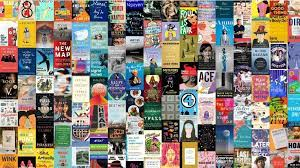

# Git Hub link
https://github.com/Pagaikwad/Book_recommendation_system.git



# Importing Libraries

In [55]:
#Importing Libraries
import numpy as np
import pandas as pd

# Mounting Drive

In [56]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading CSV Files

In [89]:
#Reading CSV Files
books = pd.read_csv('/content/drive/MyDrive/Datasets/Books.csv')
users = pd.read_csv('/content/drive/MyDrive/Datasets/Users.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Datasets/Ratings.csv')

<ipython-input-89-5c63f587e78d>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/drive/MyDrive/Datasets/Books.csv')


Checking Data of csv files

In [58]:
books['Image-URL-M'][1]

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

In [59]:
#1st 5 records
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [60]:
#1st 5 records
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [61]:
#1st 5 records
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [62]:
#dimensions of the datasets
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


# Data Cleaning

Total Null values

In [63]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [64]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [65]:
df1=users.copy()
df1['Age'].fillna(df1['Age'].mean(), inplace = True)
df1['Age']=df1['Age'].astype('int64')
df1.isnull().sum()
users=df1.copy()
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [66]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

All the Duplicate Values

In [67]:
books.duplicated().sum()

0

In [68]:
ratings.duplicated().sum()

0

In [69]:
users.duplicated().sum()

0

Correcting the Location

In [90]:
#number of unique values in 'Location'
users['Location'].nunique()

57339

In [91]:
#extracting the country names from users_df
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [ ]:
#Displaying the country names
set(users['Country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'algérie',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn würtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedà',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c

In [92]:
#correcting the mispelled country names
users.loc[users['Country'].isin(['australii','autralia','western australia']), 'Country'] = 'australia'
users.loc[users['Country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'Country'] = 'usa'
users.loc[users['Country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'
users.loc[users['Country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'Country'] = 'philippines'
users.loc[users['Country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'Country'] = 'others'
users.loc[users['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'
users.loc[users['Country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'
users['Country'].replace([ 'the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'],
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'],inplace=True)



In [93]:
#Converting the country names to uppercase
users['Country']=users['Country'].str.upper()

In [94]:
#Dropping the column 'Location'
users.drop('Location',axis=1,inplace=True)

In [95]:
users.columns

Index(['User-ID', 'Age', 'Country'], dtype='object')

## **EDA**

In [96]:
#data visualization
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt

<Axes: title={'center': '\nMost popular ratings\n'}, xlabel='Book-Rating', ylabel='count'>

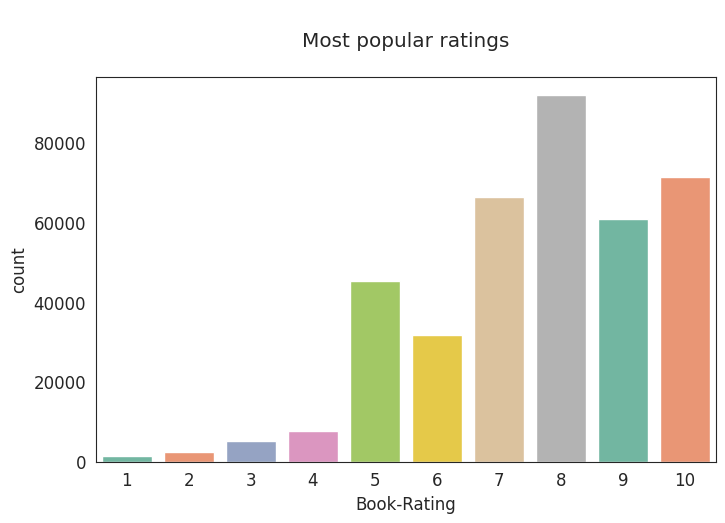

In [97]:
# most popular rating
explicit_rating = ratings[ratings['Book-Rating'] != 0]
explicit_rating.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
df = pd.merge(books, explicit_rating, on='ISBN', how='inner')
df = pd.merge(df, users, on='User-ID', how='inner')
plt.figure(figsize=[8,5])
plt.rc('font', size=12)
plt.title('\nMost popular ratings\n')
sns.countplot(data=df, x='Book-Rating',palette='Set2')

* Most of users have given above 4 ratings to books
* 8 is the most common rating given by users


<Axes: title={'center': '\nMost popular books\n'}, xlabel='Count', ylabel='Book-Title'>

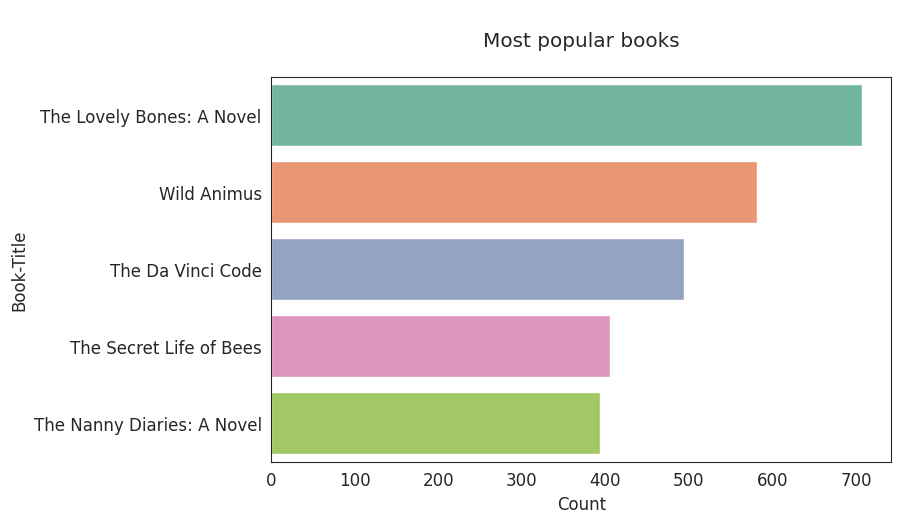

In [98]:
# top 5 most popular books

popular = df.groupby('Book-Title')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:5]
popular.columns = ['Book-Title', 'Count']

plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular books\n')
sns.barplot(data=popular, y='Book-Title', x='Count',palette='Set2')

* The book which has been rated by most number of users is  'The Lovely Bones'

<Axes: title={'center': '\nMost popular Authors\n'}, xlabel='Book-Rating', ylabel='Book-Author'>

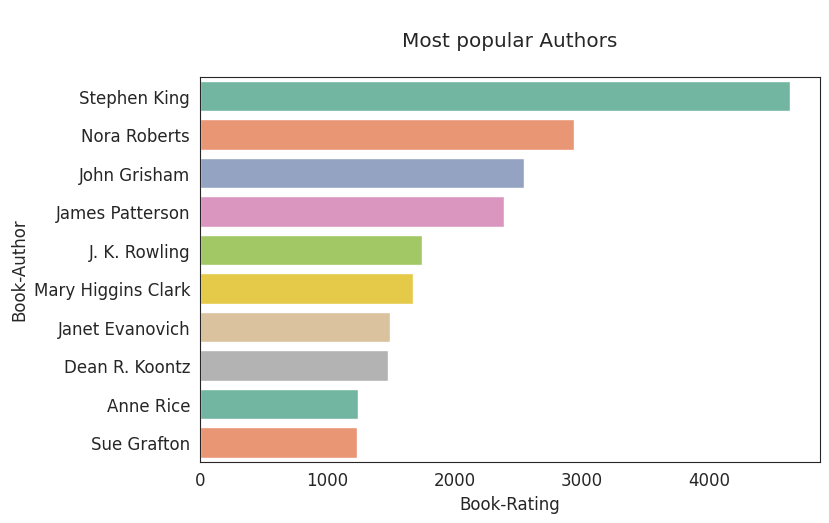

In [99]:
# most popular book authors
author = df.groupby('Book-Author')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular Authors\n')
sns.barplot(data=author, y='Book-Author', x='Book-Rating',palette='Set2')

* Top book author with respect to the number of ratings is Stephen King

In [100]:
#How many users have rated atleast 1 book?
df['User-ID'].value_counts()

11676     6943
98391     5691
189835    1899
153662    1845
23902     1180
          ... 
116107       1
220131       1
149322       1
216883       1
259679       1
Name: User-ID, Length: 68091, dtype: int64

There are 68080 users who have rated atleast one book

In [101]:
df.groupby('User-ID')['Book-Rating'].count().describe()

count    68091.000000
mean         5.637191
std         41.742511
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       6943.000000
Name: Book-Rating, dtype: float64

<Axes: xlabel='Book-Title', ylabel='Publisher'>

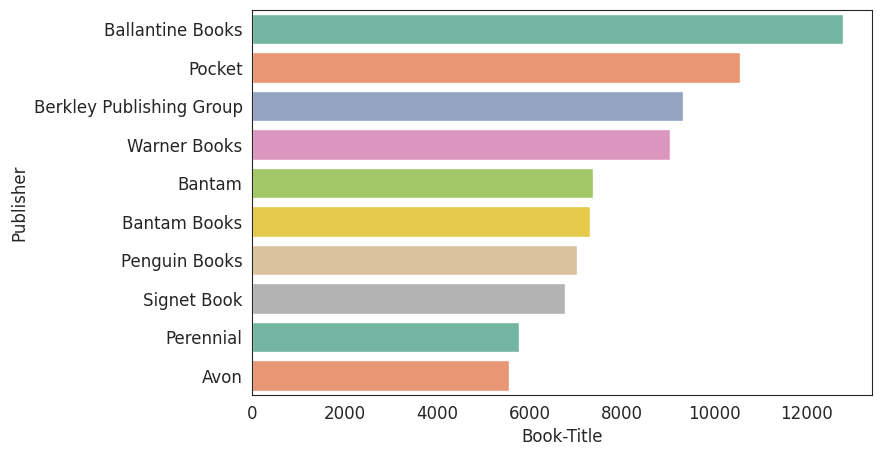

In [102]:
# Publisher with most books

publishers = df.groupby('Publisher')['Book-Title'].count().reset_index().sort_values(by='Book-Title', ascending=False)[:10]
plt.figure(figsize=[8, 5])
sns.barplot(data=publishers, x='Book-Title', y='Publisher',palette='Set2')

*  Ballantine Books is most popular publisher based on the number of users who have rated their books

Text(0.5, 0, 'No of users')

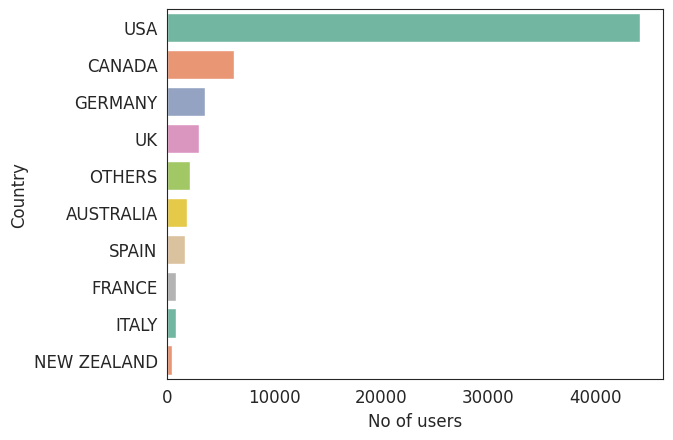

In [103]:
# countries with most readers
countries = df.groupby('Country')['User-ID'].nunique().reset_index().sort_values(by='User-ID', ascending=False)[:10]
sns.barplot(data=countries, y='Country', x='User-ID',palette='Set2')
plt.xlabel('No of users')



---


**EDA CONCLUSIONS**
* The Lovely Bones: A Novel and Wild Animus are the two most read books.
* Most popular book author based on the number of ratings is Stephan King .
* Ballantine Books and Pocket are the top publishers based on the number of ratings that their books have received.
* The majority of readers who have given the books ratings are from the United States and Canada.
* Regardless of the age group, The Lovely Bones and Wild animus appear on lists of the top-rated books.


# **Popularity Based Recommendation System**

There aren't many duplicate and null values so we can assume the data to be clean

## Popularity Based Recommender System

In [16]:
#merging rating and books datasets using ISBN
ratings_with_name = ratings.merge(books,on='ISBN')
ratings_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [17]:
#grouping by book Title and displaying Total number of ratings of each book
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [18]:
#grouping Book title and finding average rating of each book
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df.head()

<ipython-input-18-2cd123431038>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()


,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [19]:
#merging number of rating df and average rating
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df.head()

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [20]:
#displaying the books which has more than 250 ratings i.e popular and aranging them in descending order to see which is highest rated popular book
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False)
popular_df.head(50)

,Book-Title,num_ratings,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [21]:
#merging popular_df with the books
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]


In [22]:
#first 5 records of popular_df
popular_df.head()

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453


In [23]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

# **Collaborative Filtering Based Recommender System (Hybrid of CB And CF)**

 For Content Based filtering we will filter based on popularity and filter based on the number of books they have rated(good_readers and famous_books)

Criteria

1. if the book has more than 200 ratings
2. if the user has rated more than 50 books

this gives more tunned recommendation


In [97]:
# filtering books that have more than 200 ratings
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
good_readers = x[x].index
len(good_readers)

811

There are 811 readers who are good readers

In [99]:

filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(good_readers)]
len(filtered_rating)

474007

now we are left with 474007 ratings


In [89]:
#filtering out the users that have rated more than 50 books
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index
len(famous_books)

706

we can build our recommendation based on these **706 books **

if we take those books that dont have enough ratings then we might end up recommending books that dont have any similarity.

In [105]:
# Final ratings after filtering
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_ratings.shape

(58586, 10)

In [115]:
#creating pivot table with user as rows and users as columns
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [116]:
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
#Removing the null values
pt.fillna(0,inplace=True)

In [118]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
#importing sklearn.metrics.pairwise for cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [124]:
#generate similarity scores using cosine similarity
similarity_scores = cosine_similarity(pt)

In [125]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [126]:
similarity_scores.shape

(706, 706)

## Step 1: Retrieving Index

In [128]:
# Retrieving the index of movie
np.where(pt.index=='1984')[0][0]

0

Its in the 1st place of pivot column

In [129]:
np.where(pt.index=='The Notebook')[0][0]

579

## Step 2: Use the index to find the array from inside the similarity

In [131]:
# For the 1st movie in the pivot table
display(similarity_scores[0])

# Chaining from the above
similarity_scores[np.where(pt.index=='1984')[0][0]]

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

## Step 3: Sort the retrieved Array

In [74]:
list(enumerate(similarity_scores[0]))

[(0, 0.9999999999999999),
 (1, 0.10255024829874465),
 (2, 0.012208555646509366),
 (3, 0.0),
 (4, 0.053672244225442485),
 (5, 0.027749013024662858),
 (6, 0.08216491130000354),
 (7, 0.13732869060263378),
 (8, 0.03261686350494277),
 (9, 0.03667590746512177),
 (10, 0.02322418425912186),
 (11, 0.06766486753662343),
 (12, 0.020839782065795794),
 (13, 0.09673734976610586),
 (14, 0.13388864701187034),
 (15, 0.08303111691811028),
 (16, 0.1115354275858341),
 (17, 0.05100410510067514),
 (18, 0.025177841632809915),
 (19, 0.11706383185253948),
 (20, 0.0),
 (21, 0.14333792815336935),
 (22, 0.07847534327232125),
 (23, 0.06150451339525138),
 (24, 0.08723968326958673),
 (25, 0.0),
 (26, 0.07009814362931202),
 (27, 0.13658680855472938),
 (28, 0.07600327535501016),
 (29, 0.12167133598776536),
 (30, 0.007680459111722776),
 (31, 0.01473221255132234),
 (32, 0.0),
 (33, 0.07965814289647455),
 (34, 0.04522616573040869),
 (35, 0.01556270914112474),
 (36, 0.09495937740802216),
 (37, 0.018230696811058135),
 (38,

In [75]:
# Sorting without index
sorted(list(enumerate(similarity_scores[0])), key=lambda x: x[1], reverse=True)

[(0, 0.9999999999999999),
 (47, 0.2702651417103732),
 (545, 0.2639619371123496),
 (82, 0.2366937434740099),
 (634, 0.23299389358170397),
 (551, 0.2262639743141286),
 (181, 0.22222254415660225),
 (500, 0.21057743765309012),
 (344, 0.20675540390454),
 (554, 0.20025063706783053),
 (520, 0.19972624710300058),
 (527, 0.19656287691544358),
 (488, 0.19511819825564608),
 (552, 0.1920889620576415),
 (318, 0.19182230688281934),
 (624, 0.18925313707609975),
 (598, 0.18921367782346202),
 (60, 0.18908176672188648),
 (622, 0.18571699439818884),
 (647, 0.1841081817659337),
 (546, 0.18408910419891056),
 (202, 0.18049207281616433),
 (541, 0.17990898085771034),
 (309, 0.17415730924332484),
 (588, 0.1738182944100774),
 (537, 0.17008719986228352),
 (544, 0.1672877700938274),
 (66, 0.16566734565340113),
 (118, 0.165272766123669),
 (269, 0.1650329228149958),
 (354, 0.16337845332530374),
 (476, 0.16104067376144765),
 (407, 0.16041182196659062),
 (590, 0.16000267935045498),
 (666, 0.1589387141616799),
 (92, 0

## Step 4: Remove the first item and retrieve the top 5
We remove the first item from this array because we dont need to recommend a book that has already been read or displayed

In [132]:
sorted(list(enumerate(similarity_scores[0])), key=lambda x: x[1], reverse=True)[1:6]


[(47, 0.2702651417103732),
 (545, 0.2639619371123496),
 (82, 0.2366937434740099),
 (634, 0.23299389358170397),
 (551, 0.2262639743141286)]

## Step 5: Displaying the name of books from the top 5

In [133]:
for book in sorted(list(enumerate(similarity_scores[0])), key=lambda x: x[1], reverse=True)[1:6]:
    print(book[0])



47
545
82
634
551


In [78]:
for book in sorted(list(enumerate(similarity_scores[0])), key=lambda x: x[1], reverse=True)[1:6]:
    print(pt.index[book[0]])


Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


In [79]:
if 'hamkmfa' in pt.index:
    np.where(pt.index=='hamkda')[0][0]
else:
    print('Book not found')

Book not found


# Making the function

In [58]:
def recommend(book_name):
    if book_name in pt.index:
        index = np.where(pt.index == book_name)[0][0]
        similar_books_list = sorted(
        list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:11]

        print(f'Recommendations for the book {book_name}:')
        print('-'*5)
        for book in similar_books_list:
            print(pt.index[book[0]])
        print('\n')

    else:
        print('Book Not Found')
        print('\n')


In [57]:
recommend('1984')

Recommendations for the book 1984:
-----
Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel
Fahrenheit 451
The Catcher in the Rye
Naked
The Hundred Secret Senses
The Drawing of the Three (The Dark Tower, Book 2)


